# 自明解の流量の数値計算

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from lib.ds2s_OV_x0 import ds2s_OV_x0
from lib.funcs import *

In [8]:
def flow_stable(
		L: np.float64,
		K: int,
		x_0: np.float64,
		v_0: np.float64,
		dt: np.float64,
		dx: np.float64):
	if K == 0:
		return 0.0
	left = dx/dt * (
		np.log(1 + np.exp((L/K - x_0)/dx))
		- np.log(1 + np.exp(-x_0/dx))
		- np.log(1 + np.exp((L/K - x_0 - v_0*dt)/dx))
		+ np.log(1 + np.exp(-(x_0 + v_0*dt)/dx))
	)
	right = (L/K - x_0) / dt
	return K/L * min(left, right)

def flow_stable_left(
		L: np.float64,
		K: int,
		x_0: np.float64,
		v_0: np.float64,
		dt: np.float64,
		dx: np.float64):
	if K == 0:
		return 0.0
	return K/L * dx/dt * (
		np.log(1 + np.exp((L/K - x_0)/dx))
		- np.log(1 + np.exp(-x_0/dx))
		- np.log(1 + np.exp((L/K - x_0 - v_0*dt)/dx))
		+ np.log(1 + np.exp(-(x_0 + v_0*dt)/dx))
	)

def flow_stable_right(
		L: np.float64,
		K: int,
		x_0: np.float64,
		v_0: np.float64,
		dt: np.float64,
		dx: np.float64):
	if K == 0:
		return 0.0
	return K/L * (L/K - x_0) / dt

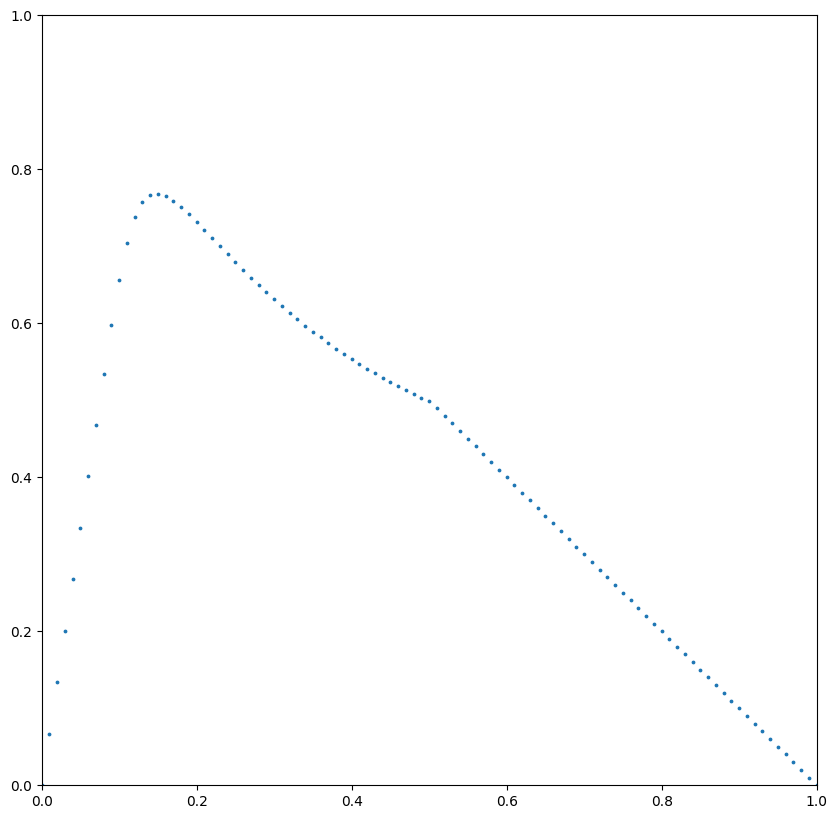

In [12]:
density = []
flow = []
flow_left = []
flow_right = []
for K in range(0, 101):
	density.append(0.1*K/10.0)
	flow.append(flow_stable(L=10.0, K=K, x_0=0.1, v_0=0.7, dt=1.0, dx=0.1))
	flow_left.append(flow_stable_left(L=10.0, K=K, x_0=0.1, v_0=0.7, dt=1.0, dx=0.1))
	flow_right.append(flow_stable_right(L=10.0, K=K, x_0=0.1, v_0=0.7, dt=1.0, dx=0.1))
plt.figure(figsize=(10, 10))
plt.xlim((0, 1.0))
plt.ylim((0, 1.0))
plt.scatter(density, flow, s=3)

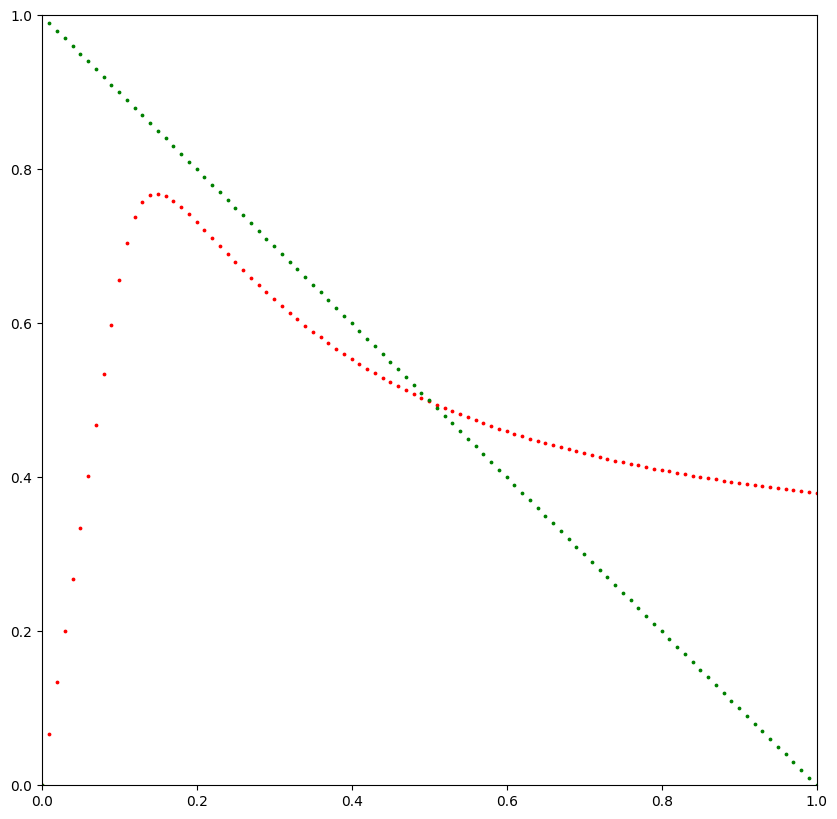

In [14]:
plt.figure(figsize=(10, 10))
plt.xlim((0, 1.0))
plt.ylim((0, 1.0))
plt.scatter(density, flow_left, s=3, color='red')
plt.scatter(density, flow_right, s=3, color='green')
plt.show()

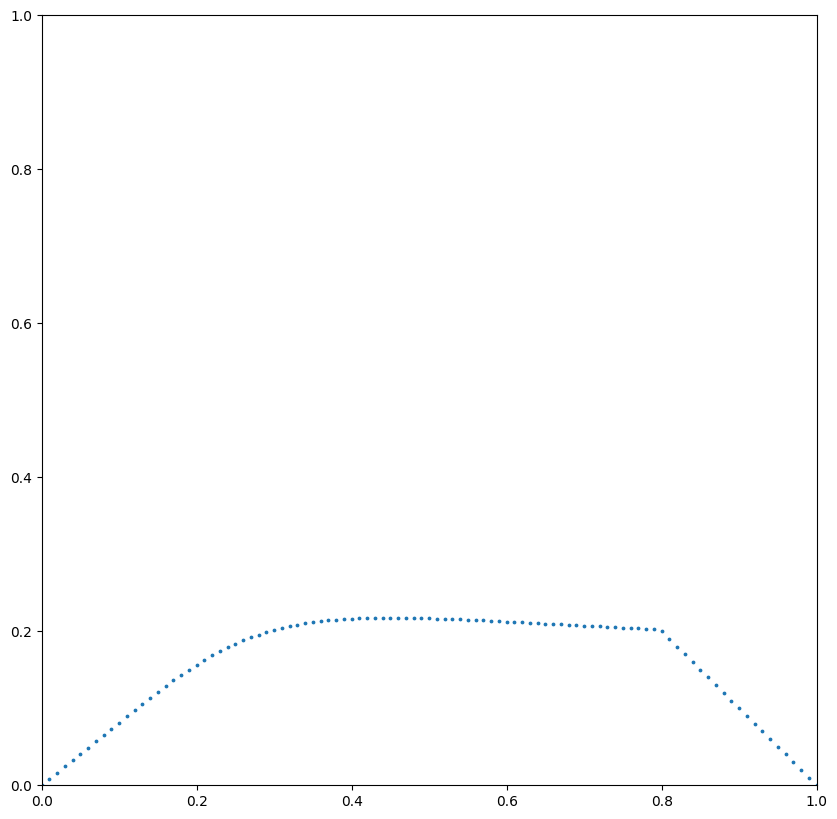

In [33]:
density = []
flow = []
L = 10.0
x_0 = 0.1
v_0 = 0.1
dt = 1.0
dx = 0.1
for K in range(0, int(L/x_0) + 1):
	if K == 0:
		density.append(0.0)
		flow.append(0.0)
		continue
	density.append(x_0 * K / L)
	flow.append(flow_stable(L=L, K=K, x_0=x_0, v_0=v_0, dt=dt, dx=dx))
plot_fundamental(density, flow)